## Interacting Simulation Analysis

This notebook will analyze band ratios when both slope and amplitude are varied simultaneously. Then the results are visually represent in a heat map

In [1]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

from fooof import FOOOF, FOOOFGroup
from fooof.analysis import *
from fooof.synth import *

from utils.ratios import *
from utils.analysis import *

In [23]:
# Settings
THETA_BAND = [4, 8]
BETA_BAND = [15, 25]

slopes = np.arange(.25, 3, .25)
amplitudes = np.arange(0, 1.5, .1)

center_freqs_low = np.arange(4, 8, .1)
center_freqs_high = np.arange(15, 25, .1)

band_widths = np.arange(.25, 1.5, .25)

## Amplitude & Slope

The following cells calculate band ratios between the interaction of amplitude and slope.

In [3]:
# load data
sl_amp_low = np.load("./dat/sl_amp_data_low.npy")
sl_amp_high = np.load("./dat/sl_amp_data_high.npy")

In [4]:
# calculate ratios
sl_amp_low_ratios = []
sl_amp_high_ratios = []

# Calculates ratio when high band is stationary and low band modulates amplitude
for sl in sl_amp_low:
    freqs = sl[1]
    
    for amp_psd in sl[2]:
        curr_ratio = calc_band_ratio(freqs, amp_psd, THETA_BAND, BETA_BAND)
        sl_amp_low_ratios.append(curr_ratio)
        
# Calculates ratio when high band is stationary and low band modulates amplitude
for sl in sl_amp_high:
    freqs = sl[1]
    
    for amp_psd in sl[2]:
        curr_ratio = calc_band_ratio(freqs, amp_psd, THETA_BAND, BETA_BAND)
        sl_amp_high_ratios.append(curr_ratio)

## Using Pandas to construct pivot table to construct heatmap

In [5]:
p_slopes = []
sl_modulo_val = len(slopes) - 1

for ind, sl in enumerate(sl_amp_high_ratios):
    p_slopes.append(slopes[ind % sl_modulo_val])
    

In [6]:
p_slopes = []
for sl in slopes:
    for amp in amplitudes:
        p_slopes.append(sl)

In [7]:
p_amps = []
amp_modulo_val = len(amplitudes)

for ind, amp in enumerate(sl_amp_high_ratios):
    p_amps.append(round(amplitudes[ind % amp_modulo_val],1))  

In [8]:
data_high = np.array([p_slopes, p_amps, sl_amp_high_ratios]).T.tolist()
data_low = np.array([p_slopes, p_amps, sl_amp_low_ratios]).T.tolist()

df_low = pd.DataFrame(data_low, columns=["Slope", "Amplitude", "Ratio_low"])
df_high = pd.DataFrame(data_high, columns=["Slope", "Amplitude", "Ratio_high"])

low = df_low.pivot("Slope", "Amplitude", "Ratio_low")
high = df_high.pivot("Slope", "Amplitude", "Ratio_high")

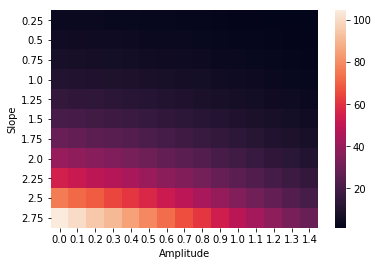

In [9]:
sb.heatmap(high)

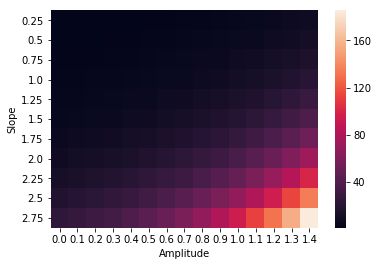

In [10]:
sb.heatmap(low)

## Center Frequency & BandWidth

In [11]:
# Load data
cf_bw_low = np.load("./dat/cf_bw_data_low.npy")
cf_bw_high = np.load("./dat/cf_bw_data_high.npy")

In [12]:
cf_bw_low

array([[4.0,
        array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. ,
       28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5,
       34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. ,
       39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5,
       45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5, 50. ]),
        array([[0.99793468, 0.67658818, 0.4929287 , 0.39561033, 0.33304723,
        0.35980167, 1.40590714, 0.2804296 , 0.20554135, 0.17975115,
        0.16820483, 0.15146922, 0.14512794, 0.13330192, 0.1276237 ,
        0.1190072 , 0.10973178, 0.10419192, 0.09981358, 0.09480763,
        0.09126506, 0.08677171, 0.084797

In [15]:
# calculate ratios
cf_bw_low_ratios = []
cf_bw_high_ratios = []

# Calculates ratio when high band is stationary and low band modulates amplitude
for cf in cf_bw_low:
    freqs = cf[1]
    
    for bw_psd in cf[2]:
        curr_ratio = calc_band_ratio(freqs, bw_psd, THETA_BAND, BETA_BAND)
        cf_bw_low_ratios.append(curr_ratio)
        
# Calculates ratio when high band is stationary and low band modulates amplitude
for cf in cf_bw_high:
    freqs = cf[1]
    
    for bw_psd in cf[2]:
        curr_ratio = calc_band_ratio(freqs, bw_psd, THETA_BAND, BETA_BAND)
        cf_bw_high_ratios.append(curr_ratio)

In [34]:
p_cf_low = []
p_cf_high = []

for cf in center_freqs_low:
    for bw in band_widths:
        p_cf_low.append(round(cf,1))
        
for cf in center_freqs_high:
    for bw in band_widths:
        p_cf_high.append(round(cf,1))

In [44]:
p_bw = []
bw_modulo_val = len(band_widths) - 1

for ind, bw in enumerate(cf_bw_low_ratios):
    p_bw.append(round(band_widths[ind % bw_modulo_val],2))


In [50]:
data_high.shape

AttributeError: 'list' object has no attribute 'shape'

In [49]:
data_high = np.array([p_cf_high, p_bw, cf_bw_high_ratios]).tolist()
data_low = np.array([p_cf_low, p_bw, cf_bw_low_ratios]).tolist()

df_low = pd.DataFrame(data_low, columns=["Center Frequency", "Bandwidth", "Ratio_low"])
df_high = pd.DataFrame(data_high, columns=["Center Frequency", "Bandwidth", "Ratio_high"])

low = df_low.pivot("Center Frequency", "Bandwidth", "Ratio_low")
high = df_high.pivot("Center Frequency", "Bandwidth", "Ratio_high")

AssertionError: 3 columns passed, passed data had 200 columns